In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities

In [4]:
 # List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

629

In [158]:
# Perform a weather check on each city using a series of successive API calls.
# Include a print log of each city as it'sbeing processed (with the city number and city name).

url = "http://api.openweathermap.org/data/2.5/weather?"
record_counter = 0
set_counter = 1
weather_data = []
for city in cities:
    try:
        query_url = f'{url}appid={weather_api_key}&q={city}&units=imperial'
        weather_response = requests.get(query_url).json()
        data = {
            "City": city,
            "Latitude": weather_response["coord"]["lat"],
            "Longitude": weather_response["coord"]["lon"],
            "Max Temp": weather_response["main"]["temp_max"],
            "Humidity": weather_response["main"]["humidity"],
            "Cloudiness":weather_response["clouds"]["all"],
            "Wind Speed":weather_response["wind"]["speed"],
            "Country":weather_response["sys"]["country"],
            "Date":weather_response["dt"]
        }
        weather_data.append(data)
        record_counter += 1
        if record_counter > 50:
            set_counter += 1
            record_counter = 1
        print(f'Processing record {record_counter} of Set {set_counter} | {city}')
    except:
        print("City not found")


Processing record 1 of Set 1 | sao filipe
Processing record 2 of Set 1 | bay roberts
Processing record 3 of Set 1 | skjervoy
Processing record 4 of Set 1 | vestmannaeyjar
Processing record 5 of Set 1 | vardo
Processing record 6 of Set 1 | hailar
Processing record 7 of Set 1 | guerrero negro
Processing record 8 of Set 1 | tasiilaq
Processing record 9 of Set 1 | ponta delgada
Processing record 10 of Set 1 | avera
Processing record 11 of Set 1 | geraldton
City not found
Processing record 12 of Set 1 | muroto
Processing record 13 of Set 1 | mataura
Processing record 14 of Set 1 | punta arenas
Processing record 15 of Set 1 | hermanus
Processing record 16 of Set 1 | avarua
Processing record 17 of Set 1 | bethel
Processing record 18 of Set 1 | iqaluit
Processing record 19 of Set 1 | atuona
Processing record 20 of Set 1 | hilo
Processing record 21 of Set 1 | phuket
Processing record 22 of Set 1 | westport
Processing record 23 of Set 1 | albany
Processing record 24 of Set 1 | namatanai
City not

Processing record 44 of Set 4 | tombouctou
Processing record 45 of Set 4 | seoul
Processing record 46 of Set 4 | deputatskiy
City not found
Processing record 47 of Set 4 | kharp
Processing record 48 of Set 4 | tilichiki
Processing record 49 of Set 4 | faanui
Processing record 50 of Set 4 | chulym
Processing record 1 of Set 5 | carutapera
Processing record 2 of Set 5 | high level
Processing record 3 of Set 5 | erenhot
Processing record 4 of Set 5 | cidreira
Processing record 5 of Set 5 | namibe
Processing record 6 of Set 5 | dandong
Processing record 7 of Set 5 | shimoda
Processing record 8 of Set 5 | puerto escondido
Processing record 9 of Set 5 | konotop
Processing record 10 of Set 5 | pavilosta
City not found
Processing record 11 of Set 5 | mehamn
Processing record 12 of Set 5 | santa vitoria do palmar
Processing record 13 of Set 5 | lagoa
Processing record 14 of Set 5 | pevek
Processing record 15 of Set 5 | sambava
Processing record 16 of Set 5 | nipawin
Processing record 17 of Set 

Processing record 38 of Set 8 | tazovskiy
Processing record 39 of Set 8 | kieta
Processing record 40 of Set 8 | eureka
Processing record 41 of Set 8 | atocha
Processing record 42 of Set 8 | berlin
Processing record 43 of Set 8 | dali
Processing record 44 of Set 8 | san quintin
Processing record 45 of Set 8 | umm lajj
Processing record 46 of Set 8 | litovko
Processing record 47 of Set 8 | yershov
Processing record 48 of Set 8 | bilma
Processing record 49 of Set 8 | zhanakorgan
Processing record 50 of Set 8 | marion
Processing record 1 of Set 9 | iquique
Processing record 2 of Set 9 | balsas
Processing record 3 of Set 9 | ballina
Processing record 4 of Set 9 | ormara
Processing record 5 of Set 9 | clyde river
Processing record 6 of Set 9 | quatre cocos
Processing record 7 of Set 9 | covington
Processing record 8 of Set 9 | acarau
Processing record 9 of Set 9 | kaz
Processing record 10 of Set 9 | hirara
Processing record 11 of Set 9 | sao borja
Processing record 12 of Set 9 | pontes e lac

Processing record 32 of Set 12 | milos
Processing record 33 of Set 12 | xichang
Processing record 34 of Set 12 | thaba nchu
Processing record 35 of Set 12 | sydney
Processing record 36 of Set 12 | siquirres


 ## Convert Raw Data to DataFrame

In [103]:
city_df = pd.DataFrame(weather_data)

# Export the city data into a .csv.
output_data_file = city_df.to_csv("output_data/cities.csv",index=False)

# Display the DataFrame
city_df.head()

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,sao filipe,14.90,-24.50,78.98,66,80,7.20,CV,1605848346
1,bay roberts,47.60,-53.26,28.00,58,90,20.80,CA,1605848346
2,skjervoy,70.03,20.97,33.80,69,75,28.86,NO,1605848150
3,vestmannaeyjar,63.44,-20.27,44.22,67,92,15.61,IS,1605848346
4,vardo,70.37,31.11,35.60,80,40,21.92,NO,1605848346


In [100]:
# Describing the dataset
city_df.describe()

,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,586.000000,586.000000,586.00000,586.000000,586.000000,586.000000,5.860000e+02
mean,19.467048,14.082952,56.31884,73.870307,51.861775,8.756177,1.605848e+09
std,33.193811,91.185557,25.07861,19.600634,38.421010,6.075489,9.851998e+01
min,-54.800000,-179.170000,-19.32000,1.000000,0.000000,0.360000,1.605848e+09
25%,-9.312500,-65.560000,37.40000,65.000000,13.250000,4.215000,1.605848e+09
50%,22.785000,19.980000,62.01000,78.000000,54.500000,7.295000,1.605848e+09
75%,47.877500,95.492500,77.00000,89.000000,90.000000,11.940000,1.605848e+09
max,78.220000,178.420000,100.40000,100.000000,100.000000,37.000000,1.605849e+09


## Inspect the data and remove the cities where the humidity > 100%.

In [104]:
# Drop cities that have humidity over 100%
low_humidity_city = city_df[(city_df['Humidity'] < 100)]
low_humidity_city.head()

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,sao filipe,14.90,-24.50,78.98,66,80,7.20,CV,1605848346
1,bay roberts,47.60,-53.26,28.00,58,90,20.80,CA,1605848346
2,skjervoy,70.03,20.97,33.80,69,75,28.86,NO,1605848150
3,vestmannaeyjar,63.44,-20.27,44.22,67,92,15.61,IS,1605848346
4,vardo,70.37,31.11,35.60,80,40,21.92,NO,1605848346


In [105]:
# Describe new dataset without cities that have humidity over 100%

low_humidity_city.describe()

,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,5.700000e+02
mean,19.381105,15.971684,56.358386,73.136842,51.812281,8.870018,1.605848e+09
std,33.440678,91.227353,25.286702,19.371374,38.536608,6.095791,9.953703e+01
min,-54.800000,-179.170000,-19.320000,1.000000,0.000000,0.360000,1.605848e+09
25%,-9.765000,-64.177500,37.400000,64.000000,11.250000,4.425000,1.605848e+09
50%,23.045000,21.975000,62.190000,78.000000,55.000000,7.495000,1.605848e+09
75%,48.465000,98.180000,77.000000,88.000000,90.000000,12.080000,1.605848e+09
max,78.220000,178.420000,100.400000,99.000000,100.000000,37.000000,1.605849e+09


In [109]:
# Print indices of cities with humidity over 100%
city_index = city_df.loc[(city_df["Humidity"] >= 100)]
list(city_index.index)

[63, 86, 134, 171, 180, 227, 237, 245, 251, 259, 297, 355, 412, 445, 462, 487]

## Plotting the Data

### Latitude vs. Temperature Plot

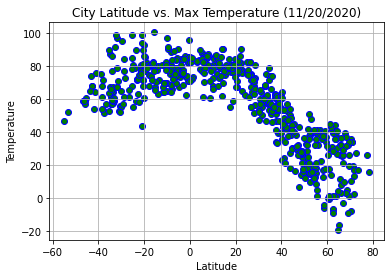

In [155]:
# Plotting the Data
# Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
# Save the plotted figures as .pngs.
# Latitude vs. Temperature Plot

latitude = low_humidity_city["Latitude"]
temperature = low_humidity_city["Max Temp"]

plt.scatter(latitude, temperature,color="g",edgecolors="b")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.title("City Latitude vs. Max Temperature (11/20/2020)")
plt.grid()
plt.savefig("output_data/lat_temp.png")
plt.show()

#### This graph illustrates that the closer the cities that are closer to the south pole have higher temperature and cities that are further from the equator have lower temperature.

### Latitude vs. Humidity Plot

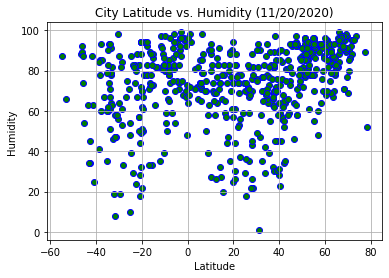

In [119]:
# Latitude vs. Humidity Plot
latitude = low_humidity_city["Latitude"]
humidity = low_humidity_city["Humidity"]

plt.scatter(latitude, humidity,color="g",edgecolors="b")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("City Latitude vs. Humidity (11/20/2020)")
plt.grid()
plt.savefig("output_data/lat_humidity.png")
plt.show()

#### The graph above shows that there is weak correlation between between lattitude and humidity. However, there seems to be concentration of cities around the latitude of 60 and humidity between 80 and 100. This shows that there are more locations with high humidity the further it is above the equator.

### Latitude vs. Cloudiness Plot

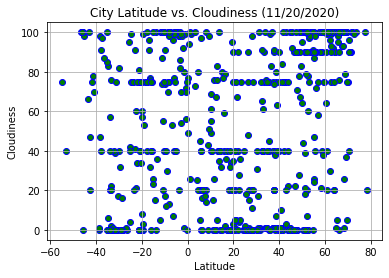

In [120]:
latitude = low_humidity_city["Latitude"]
cloudiness = low_humidity_city["Cloudiness"]

plt.scatter(latitude, cloudiness,color="g",edgecolors="b")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("City Latitude vs. Cloudiness (11/20/2020)")
plt.grid()
plt.savefig("output_data/lat_cloudiness.png")
plt.show()

#### The graph above shows that there is no correlation between latitude and cloudiness.

### Latitude vs. Wind Speed Plot

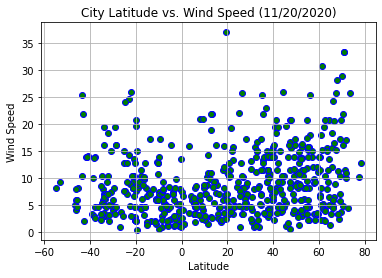

In [121]:
latitude = low_humidity_city["Latitude"]
wind_speed = low_humidity_city["Wind Speed"]

plt.scatter(latitude, wind_speed,color="g",edgecolors="b")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("City Latitude vs. Wind Speed (11/20/2020)")
plt.grid()
plt.savefig("output_data/lat_windspeed.png")
plt.show()

#### The graph above shows that wind speed seems to be concentrated between 0 to 15 mph.

## Linear Regression

###  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

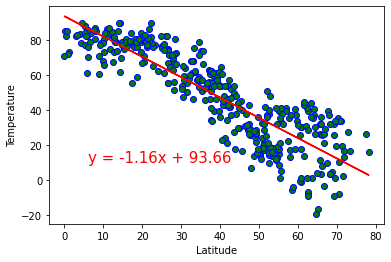

The r-squared value is: -0.8719048642452333


In [128]:
northern_hemisphere = low_humidity_city[(low_humidity_city['Latitude'] > 0)]
n_latitude = northern_hemisphere["Latitude"]
n_temperature = northern_hemisphere["Max Temp"]

# Add the linear regression equation and line to plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(n_latitude, n_temperature)
regress_values = n_latitude * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(n_latitude, n_temperature,color="g",edgecolors="b")
plt.plot(n_latitude,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.savefig("output_data/northern_lat_temp.png")
plt.show()
(print(f"The r-squared value is: {rvalue}"))

#### The graph above shows that there is strong negative correlation between the temperature and latitude. This means that the closer the locations are to the north pole, the colder the weather becomes.

### Southern Hemisphere - Max Temp vs. Latitude Linear Regression

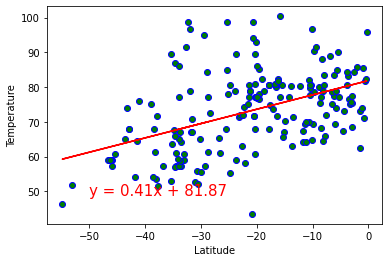

The r-squared value is: 0.46639257009829505


In [148]:
southern_hemisphere = low_humidity_city[(low_humidity_city['Latitude'] < 0)]
s_latitude = southern_hemisphere["Latitude"]
s_temperature = southern_hemisphere["Max Temp"]

# Add the linear regression equation and line to plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(s_latitude, s_temperature)
regress_values = s_latitude * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(s_latitude, s_temperature,color="g",edgecolors="b")
plt.plot(s_latitude,regress_values,"r-")
plt.annotate(line_eq,(-50,49),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.savefig("output_data/southern_lat_temp.png")
plt.show()
(print(f"The r-squared value is: {rvalue}"))

#### The graph above shows that there is moderate correlation between temperature and latitude. This means that the closer the locations are to the equator, it is likely that the warmer the weather becomes.

### Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

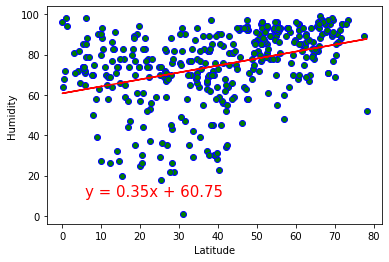

The r-squared value is: 0.36250351631194866


In [133]:
northern_hemisphere = low_humidity_city[(low_humidity_city['Latitude'] > 0)]
n_latitude = northern_hemisphere["Latitude"]
n_humidity = northern_hemisphere["Humidity"]

# Add the linear regression equation and line to plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(n_latitude, n_humidity)
regress_values = n_latitude * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(n_latitude, n_humidity,color="g",edgecolors="b")
plt.plot(n_latitude,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.savefig("output_data/northern_lat_humidity.png")
plt.show()
(print(f"The r-squared value is: {rvalue}"))

#### The graph above shows that there is weak correlation between humidity and latitude above the equator.

### Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

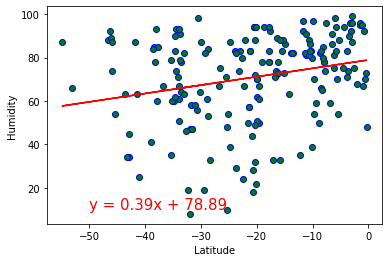

The r-squared value is: 0.24428980808055847


In [145]:
southern_hemisphere = low_humidity_city[(low_humidity_city['Latitude'] < 0)]
s_latitude = southern_hemisphere["Latitude"]
s_humidity = southern_hemisphere["Humidity"]

# Add the linear regression equation and line to plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(s_latitude, s_humidity)
regress_values = s_latitude * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(s_latitude, s_humidity,color="g",edgecolors="b")
plt.plot(s_latitude,regress_values,"r-")
plt.annotate(line_eq,(-50,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.savefig("output_data/southern_lat_humidity.png")
plt.show()
(print(f"The r-squared value is: {rvalue}"))

#### The graph above shows that there is weak correlation between humidity and latitude below the equator.

### Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

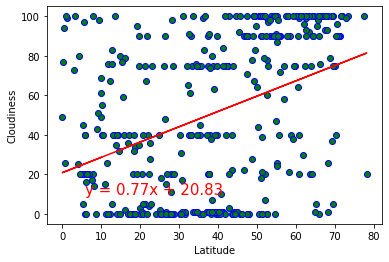

The r-squared value is: 0.3892081339861128


In [135]:
northern_hemisphere = low_humidity_city[(low_humidity_city['Latitude'] > 0)]
n_latitude = northern_hemisphere["Latitude"]
n_cloudiness = northern_hemisphere["Cloudiness"]

# Add the linear regression equation and line to plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(n_latitude, n_cloudiness)
regress_values = n_latitude * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(n_latitude, n_cloudiness,color="g",edgecolors="b")
plt.plot(n_latitude,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.savefig("output_data/northern_lat_cloudiness.png")
plt.show()
(print(f"The r-squared value is: {rvalue}"))

#### The graph above shows that there is weak correlation between cloudiness and latitude that is above the equator.

### Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

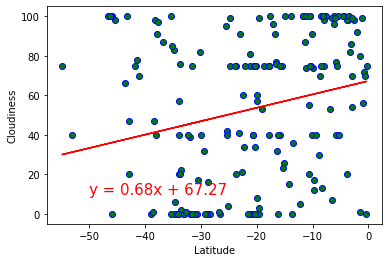

The r-squared value is: 0.2345455831428247


In [144]:
southern_hemisphere = low_humidity_city[(low_humidity_city['Latitude'] < 0)]
s_latitude = southern_hemisphere["Latitude"]
s_cloudiness = southern_hemisphere["Cloudiness"]

# Add the linear regression equation and line to plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(s_latitude, s_cloudiness)
regress_values = s_latitude * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(s_latitude, s_cloudiness,color="g",edgecolors="b")
plt.plot(s_latitude,regress_values,"r-")
plt.annotate(line_eq,(-50,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.savefig("output_data/southern_lat_cloudiness.png")
plt.show()
(print(f"The r-squared value is: {rvalue}"))

#### The graph above shows that there is weak correlation between cloudiness and latitude beneath the equator.

### Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

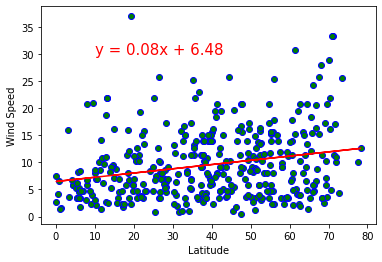

The r-squared value is: 0.24105393691177662


In [143]:
northern_hemisphere = low_humidity_city[(low_humidity_city['Latitude'] > 0)]
n_latitude = northern_hemisphere["Latitude"]
n_windspeed = northern_hemisphere["Wind Speed"]

# Add the linear regression equation and line to plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(n_latitude, n_windspeed)
regress_values = n_latitude * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(n_latitude, n_windspeed,color="g",edgecolors="b")
plt.plot(n_latitude,regress_values,"r-")
plt.annotate(line_eq,(10,30),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.savefig("output_data/northern_lat_windspeed.png")
plt.show()
(print(f"The r-squared value is: {rvalue}"))

#### The graph above shows that there is weak correlation between wind speed and latitude above the equator.

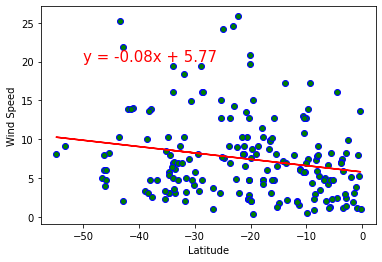

The r-squared value is: -0.20180309818628558


In [152]:
southern_hemisphere = low_humidity_city[(low_humidity_city['Latitude'] < 0)]
s_latitude = southern_hemisphere["Latitude"]
s_windspeed = southern_hemisphere["Wind Speed"]

# Add the linear regression equation and line to plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(s_latitude, s_windspeed)
regress_values = s_latitude * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(s_latitude, s_windspeed,color="g",edgecolors="b")
plt.plot(s_latitude,regress_values,"r-")
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.savefig("output_data/northern_lat_windspeed.png")
plt.show()
(print(f"The r-squared value is: {rvalue}"))

#### The graph above illustrates that there is weak negative correlation between wind speed and latitude beneath the equator.